In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

small = pd.read_excel('small_airports.xlsx')
small.head()

,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count
0,abuja,Alan Wan,United Kingdom,2012-02-28,On arrival as we flew Business Class we were n...,6.0,2.0,3.0,1.0,0.0,6
1,abuja,A Cobo,United States,2011-08-08,Abuja international arrivals greets you with a...,2.0,1.0,3.0,1.0,0.0,6
2,abuja,Antonio Tettamanzy,Brazil,2011-04-14,It was better than expected but can be quite m...,3.0,3.0,3.0,1.0,0.0,6
3,abuja,C Stafford,NaN,2010-01-31,Upon arrival from Amsterdam on KLM I went to u...,2.0,NaN,NaN,NaN,0.0,6
4,abuja,Mark Bickerton,NaN,2009-05-24,The international terminal is nice and quite w...,NaN,NaN,NaN,2.0,0.0,6


In [3]:
print(small['recommended'].isna().sum())

151


In [32]:
small.loc[small['experience_airport'].isin([0, 1]), 'recommended'] = small['experience_airport']
small.loc[small['experience_airport'].isin([0, 1]), 'experience_airport'] = np.nan  # Optional: set to NaN in experience_airport

        

In [33]:
small['overall_rating'] = small['overall_rating'].astype(float)

In [34]:
small['terminal_cleanliness_rating'] = small['terminal_cleanliness_rating'].astype(float)

In [35]:
small.dtypes

airport_name                    object
author                          object
author_country                  object
date                            object
content                         object
experience_airport             float64
overall_rating                 float64
terminal_cleanliness_rating    float64
terminal_seating_rating        float64
recommended                    float64
count                            int64
dtype: object

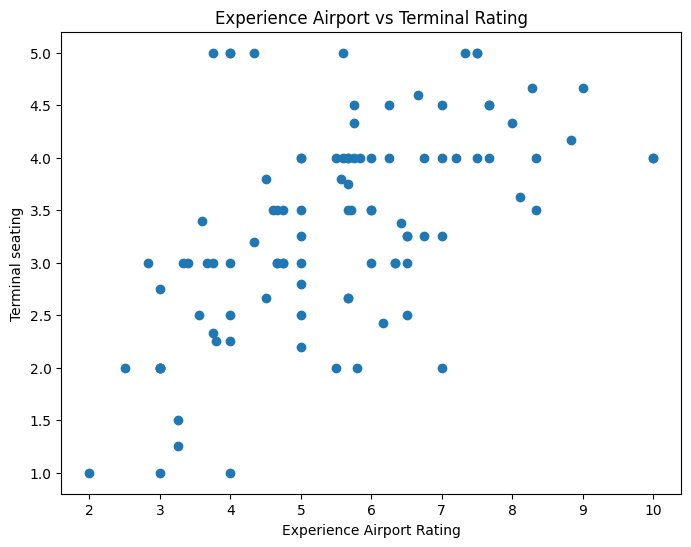

In [36]:
grouped_data = small.groupby('airport_name')[['experience_airport', 'terminal_seating_rating']].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(grouped_data['experience_airport'], grouped_data['terminal_seating_rating'])
plt.xlabel('Experience Airport Rating')
plt.ylabel('Terminal seating')
plt.title('Experience Airport vs Terminal Rating')

plt.show()

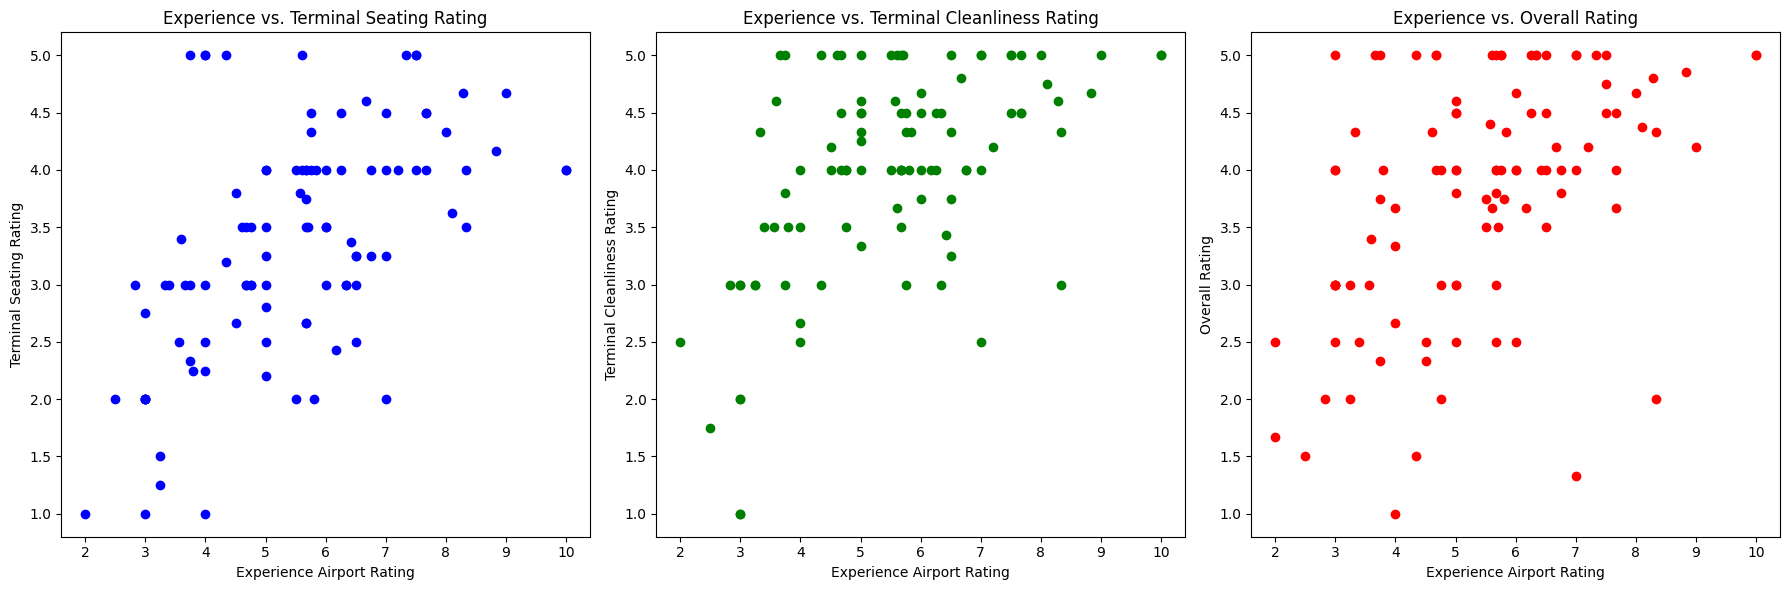

In [37]:
# Group data by airport_name and calculate means
grouped_data = small.groupby('airport_name')[['experience_airport', 'terminal_seating_rating', 'terminal_cleanliness_rating', 'overall_rating']].mean().reset_index()

# Set up the figure and subplots for a horizontal layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot 1: Experience vs. Terminal Seating Rating
axs[0].scatter(grouped_data['experience_airport'], grouped_data['terminal_seating_rating'], color='b')
axs[0].set_xlabel('Experience Airport Rating')
axs[0].set_ylabel('Terminal Seating Rating')
axs[0].set_title('Experience vs. Terminal Seating Rating')

# Scatter plot 2: Experience vs. Terminal Cleanliness Rating
axs[1].scatter(grouped_data['experience_airport'], grouped_data['terminal_cleanliness_rating'], color='g')
axs[1].set_xlabel('Experience Airport Rating')
axs[1].set_ylabel('Terminal Cleanliness Rating')
axs[1].set_title('Experience vs. Terminal Cleanliness Rating')

# Scatter plot 3: Experience vs. Overall Rating
axs[2].scatter(grouped_data['experience_airport'], grouped_data['overall_rating'], color='r')
axs[2].set_xlabel('Experience Airport Rating')
axs[2].set_ylabel('Overall Rating')
axs[2].set_title('Experience vs. Overall Rating')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [38]:
unique_airport_names = small['airport_name'].unique()
print(unique_airport_names)

['abuja ' 'algiers ' 'almeria ' 'antwerp deurne ' 'aruba reina beatrix '
 'banjul ' 'beirut ' 'belo horizonte confins ' 'bergen ' 'bermuda '
 'billund ' 'bourgas ' 'brasilia ' 'carcassonne ' 'chambery ' 'chengdu '
 'clark ' 'coimbatore ' 'colorado springs ' 'columbus ' 'coventry '
 'crown point tobago ' 'curacao ' 'dakar ' 'dallas love field '
 'dortmund ' 'dubrovnik ' 'dundee ' 'durban ' 'durhamtees valley '
 'entebbe ' 'ercan ' 'fort myers ' 'freetown ' 'fuerteventura '
 'gibraltar ' 'granada ' 'guayaquil ' 'guernsey ' 'hamad doha '
 'hamburg lubek ' 'hangzhou ' 'hartford ' 'hilo ' 'hobart ' 'holguin '
 'humberside ' 'hurghada ' 'indianapolis ' 'jacksonville ' 'john wayne '
 'katowice ' 'kilimanjaro ' 'kota kinabalu ' 'kunming ' 'launceston '
 'leipzighalle ' 'linz ' 'little rock ' 'long beach '
 'long island macarthur ' 'lusaka ' 'luxor ' 'mahon ' 'malmo ' 'manaus '
 'medan ' 'memphis ' 'milwaukee ' 'mombasa ' 'monastir ' 'muscle shoals '
 'nashville ' 'nimes ' 'pau ' 'perpignan ' '

In [39]:
nunique_airports = small['airport_name'].nunique()
print(nunique_airports)

113


In [40]:
small.tail()

,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count
756,zanzibar,M Noormohamed,United States,2015-01-19,The worst airport I have ever transited throug...,2.0,2.0,3.0,4.0,0.0,5
757,zanzibar,I Cameron,United Kingdom,2014-07-12,An old fashioned airport which is not very eff...,4.0,2.0,2.0,2.0,0.0,5
758,zanzibar,Todd Bailey,United States,2011-08-25,The airport in Zanzibar is out of date. The bu...,NaN,1.0,1.0,1.0,1.0,5
759,zanzibar,David Ellis,United Kingdom,2010-01-26,Zanzibar airport would almost be bearable if i...,2.0,1.0,1.0,1.0,0.0,5
760,zanzibar,J Beard,NaN,2009-05-01,Not bad for a regional airport for arriving in...,2.0,NaN,NaN,NaN,0.0,5


In [41]:
# 1. Group by 'airport_name' and calculate the mean of 'recommended'
mean_recommended = small.groupby('airport_name')['recommended'].mean().reset_index()
small = pd.merge(small, mean_recommended, on='airport_name', suffixes=('', '_mean'))

In [42]:
small.head(80)

,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean
0,abuja,Alan Wan,United Kingdom,2012-02-28,On arrival as we flew Business Class we were n...,6.0,2.0,3.0,1.0,0.0,6,0.000000
1,abuja,A Cobo,United States,2011-08-08,Abuja international arrivals greets you with a...,2.0,1.0,3.0,1.0,0.0,6,0.000000
2,abuja,Antonio Tettamanzy,Brazil,2011-04-14,It was better than expected but can be quite m...,3.0,3.0,3.0,1.0,0.0,6,0.000000
3,abuja,C Stafford,NaN,2010-01-31,Upon arrival from Amsterdam on KLM I went to u...,2.0,NaN,NaN,NaN,0.0,6,0.000000
4,abuja,Mark Bickerton,NaN,2009-05-24,The international terminal is nice and quite w...,NaN,NaN,NaN,2.0,0.0,6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
75,billund,Janne Petersson,NaN,2008-07-04,This is a fantastic airport. Short walking dis...,10.0,NaN,NaN,5.0,1.0,6,0.833333
76,billund,Hanne Eeg Jensen,NaN,2008-05-20,Arrival: Nice short walking distance to baggag...,8.0,NaN,NaN,NaN,1.0,6,0.833333
77,billund,J Morgan,NaN,2008-03-27,Billund is a stellar airport now to put it sim...,10.0,NaN,NaN,NaN,1.0,6,0.833333
78,bourgas,Doug Knock,United Kingdom,2012-05-16,Airport is not greatest - currently outdoor se...,3.0,4.0,2.0,2.0,0.0,5,0.333333


In [43]:
# Region classification dictionary
region_classification = {
    # Europe
    'almeria': 'Europe',
    'antwerp deurne': 'Europe',
    'bergen': 'Europe',
    'billund': 'Europe',
    'bourgas': 'Europe',
    'carcassonne': 'Europe',
    'chambery': 'Europe',
    'coventry': 'Europe',
    'dortmund': 'Europe',
    'dubrovnik': 'Europe',
    'dundee': 'Europe',
    'durhamtees valley': 'Europe',
    'ercan': 'Europe',
    'fuerteventura': 'Europe',
    'gibraltar': 'Europe',
    'granada': 'Europe',
    'guernsey': 'Europe',
    'hamburg lubek': 'Europe',
    'humberside': 'Europe',
    'katowice': 'Europe',
    'leipzighalle': 'Europe',
    'linz': 'Europe',
    'mahon': 'Europe',
    'malmo': 'Europe',
    'nimes': 'Europe',
    'pau': 'Europe',
    'perpignan': 'Europe',
    'ponta delgada': 'Europe',
    'poznan': 'Europe',
    'pristina': 'Europe',
    'salzburg': 'Europe',
    'sarajevo': 'Europe',
    'seville': 'Europe',
    'skopje': 'Europe',
    'stockholm vasteras': 'Europe',
    'tirana': 'Europe',
    'trieste': 'Europe',
    'tromso': 'Europe',
    'vnukovo': 'Europe',
    'waterford': 'Europe',
    'wroclaw strachowice': 'Europe',

    # Middle-East
    'beirut': 'Middle-East',
    'hamad doha': 'Middle-East',
    'sharjah': 'Middle-East',
    'tehran mehrabad': 'Middle-East',

    # Asia
    'chengdu': 'Asia',
    'coimbatore': 'Asia',
    'hangzhou': 'Asia',
    'kunming': 'Asia',
    'pune': 'Asia',
    'qingdao': 'Asia',
    'sapporo chitose': 'Asia',
    'seoul gimpo': 'Asia',
    'shenyang': 'Asia',
    'xian xianyang': 'Asia',
    'xiamen': 'Asia',

    # South-East Asia and Oceania
    'clark': 'S-Asia Oceania',
    'kota kinabalu': 'S-Asia Oceania',
    'medan': 'S-Asia Oceania',
    'subang kuala lumpur': 'S-Asia Oceania',
    'vientiane': 'S-Asia Oceania',
    'yogyakarta': 'S-Asia Oceania',
    'hobart': 'S-Asia Oceania',
    'launceston': 'S-Asia Oceania',
    'tontouta': 'S-Asia Oceania',

    # Latin America
    'aruba reina beatrix': 'Latin America',
    'belo horizonte confins': 'Latin America',
    'brasilia': 'Latin America',
    'crown point tobago': 'Latin America',
    'curacao': 'Latin America',
    'guayaquil': 'Latin America',
    'holguin': 'Latin America',
    'manaus': 'Latin America',
    'quito mariscal': 'Latin America',
    'recife': 'Latin America',
    'salvador': 'Latin America',
    'santo domingo': 'Latin America',
    'sao paulo congonhas': 'Latin America',

    # North America
    'bermuda': 'North America',
    'colorado springs': 'North America',
    'columbus': 'North America',
    'dallas love field': 'North America',
    'fort myers': 'North America',
    'hartford': 'North America',
    'hilo': 'North America',
    'indianapolis': 'North America',
    'jacksonville': 'North America',
    'john wayne': 'North America',
    'little rock': 'North America',
    'long beach': 'North America',
    'long island macarthur': 'North America',
    'milwaukee': 'North America',
    'muscle shoals': 'North America',
    'nashville': 'North America',
    'sacramento': 'North America',

    # Africa
    'abuja': 'Africa',
    'algiers': 'Africa',
    'banjul': 'Africa',
    'dakar': 'Africa',
    'durban': 'Africa',
    'entebbe': 'Africa',
    'freetown': 'Africa',
    'hurghada': 'Africa',
    'kilimanjaro': 'Africa',
    'lusaka': 'Africa',
    'luxor': 'Africa',
    'mombasa': 'Africa',
    'monastir': 'Africa',
    'seychelles': 'Africa',
    'taba': 'Africa',
    'windhoek': 'Africa',
    'zanzibar': 'Africa',
}

# Ensure proper matching of airport names and regions
def classify_airport(airport_name):
    airport_name_cleaned = airport_name.strip().lower()  # Clean the name by removing leading/trailing spaces and making lowercase
    return region_classification.get(airport_name_cleaned, 'Unknown')  # If no match, return 'Unknown'

#'apply' method on the DataFrame to apply the function
small['geo_area'] = small['airport_name'].apply(classify_airport)


In [44]:
small.head(50)

,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean,geo_area
0,abuja,Alan Wan,United Kingdom,2012-02-28,On arrival as we flew Business Class we were n...,6.0,2.0,3.0,1.0,0.0,6,0.000000,Africa
1,abuja,A Cobo,United States,2011-08-08,Abuja international arrivals greets you with a...,2.0,1.0,3.0,1.0,0.0,6,0.000000,Africa
2,abuja,Antonio Tettamanzy,Brazil,2011-04-14,It was better than expected but can be quite m...,3.0,3.0,3.0,1.0,0.0,6,0.000000,Africa
3,abuja,C Stafford,NaN,2010-01-31,Upon arrival from Amsterdam on KLM I went to u...,2.0,NaN,NaN,NaN,0.0,6,0.000000,Africa
4,abuja,Mark Bickerton,NaN,2009-05-24,The international terminal is nice and quite w...,NaN,NaN,NaN,2.0,0.0,6,0.000000,Africa
5,abuja,S Adewale,NaN,2007-03-03,In Nigerian standards relatively clean and org...,NaN,NaN,NaN,NaN,0.0,6,0.000000,Africa
6,algiers,Qaddoumi Samar,Kuwait,2013-05-16,Algiers airport is huge and clean but I did no...,5.0,4.0,5.0,3.0,0.0,8,0.166667,Africa
7,algiers,R Oussalah,Taiwan,2012-10-10,This is the first time in over a year I used t...,7.0,4.0,5.0,3.0,1.0,8,0.166667,Africa
8,algiers,Mohamed Salah,France,2011-07-27,Good airport international terminal T1 is nice...,4.0,5.0,5.0,5.0,0.0,8,0.166667,Africa
9,algiers,R Oussalah,Italy,2011-01-19,For departures Algiers new airport is fairly s...,NaN,NaN,NaN,NaN,NaN,8,0.166667,Africa


In [45]:
groupedby_region = small.groupby('geo_area').apply(lambda x: x.sort_values(by='geo_area'))
groupedby_region.head(20)  


/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_1242/3634756729.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupedby_region = small.groupby('geo_area').apply(lambda x: x.sort_values(by='geo_area'))


airport_name            author  author_country        date  \
geo_area                                                                  
Africa   0         abuja           Alan Wan  United Kingdom  2012-02-28   
         474     mombasa       Nick Serpell             NaN  2006-03-15   
         473     mombasa      Paul Whiteley             NaN  2007-12-12   
         472     mombasa           H Lilley             NaN  2008-07-14   
         471     mombasa         L Suckling             NaN  2010-10-28   
         470     mombasa           S Powley  United Kingdom  2011-10-31   
         469     mombasa          Mark Cole  United Kingdom  2012-03-14   
         468     mombasa          W Pechler     Netherlands  2012-09-03   
         467     mombasa       Grahame Tate  United Kingdom  2013-12-23   
         421       luxor      Jenny Bentley             NaN  2005-12-21   
         420       luxor            B Barry             NaN  2006-06-20   
         419       luxor        J Catherall             NaN  2008-06-20   
         475     mombasa        Val Prinsep             NaN  2005-11-21   
         418       luxor            B Smith             NaN  2008-08-02   
         416       luxor            M Doray             NaN  2010-12-28   
         415       luxor        John Treacy  United Kingdom  2014-08-18   
         414       luxor           A Watson  United Kingdom  2015-01-19   
         413      lusaka   Nicholas Noblias             NaN  2005-03-21   
         412      lusaka   Keith Mwanalushi             NaN  2005-05-10   
         411      lusaka           G Balint             NaN  2008-02-19   

                                                        content  \
geo_area                                                          
Africa   0    On arrival as we flew Business Class we were n...   
         474  Mombasa is a basic bucket and spade airport. W...   
         473  Overall not a bad airport. Airport very warm b...   
         472  I don't know what airport the previous person ...   
         471  We have flown in and out of this airport nine ...   
         470  We travelled back to the UK on 28th October - ...   
         469  Traveled in Feb/March 2012 and fingerprints ar...   
         468  Arrived from Nairobi and flew to Amsterdam on ...   
         467  Typical African airport. After you go through ...   
         421  I gather that Luxor airport is new: a resident...   
         420  I would agree with the above comments. The onl...   
         419  When we arrived at Luxor airport & got off the...   
         475  Mombasa airport is one of those open air jobs ...   
         418  We used Luxor airport both for internal flight...   
         416  Arrived at 3pm for a 6pm flight. Long queue fo...   
         415  We flew into and out of Luxor as international...   
         414  Arrived at the airport from Gatwick. Was peste...   
         413  Considering this is an airport in a poor Afric...   
         412  In the last 2 years Lusaka International Airpo...   
         411  I have recently been in Lusaka. The airport is...   

              experience_airport  overall_rating  terminal_cleanliness_rating  \
geo_area                                                                        
Africa   0                   6.0             2.0                          3.0   
         474                 NaN             NaN                          NaN   
         473                 NaN             NaN                          NaN   
         472                 NaN             NaN                          NaN   
         471                 NaN             NaN                          NaN   
         470                 6.0             4.0                          4.0   
         469                 2.0             1.0                          3.0   
         468                 7.0             4.0                          3.0   
         467                 NaN             NaN                          NaN

In [46]:
mean_overall_rating = small.groupby('airport_name')['overall_rating'].mean().reset_index()
mean_overall_rating.head()

,airport_name,overall_rating
0,abuja,2.000000
1,algiers,4.333333
2,almeria,5.000000
3,antwerp deurne,5.000000
4,aruba reina beatrix,2.333333


In [47]:
mean_terminal_cleanliness_rating = small.groupby('airport_name')['terminal_cleanliness_rating'].mean().reset_index()
mean_terminal_cleanliness_rating.head()

,airport_name,terminal_cleanliness_rating
0,abuja,3.0
1,algiers,5.0
2,almeria,5.0
3,antwerp deurne,4.0
4,aruba reina beatrix,4.2


In [48]:
mean_terminal_seating_rating = small.groupby('airport_name')['terminal_seating_rating'].mean().reset_index()
mean_terminal_seating_rating.head()

,airport_name,terminal_seating_rating
0,abuja,1.25
1,algiers,3.50
2,almeria,3.00
3,antwerp deurne,4.00
4,aruba reina beatrix,3.80


In [49]:
mean_experience_airport = small.groupby('airport_name')['experience_airport'].mean().reset_index()
mean_terminal_seating_rating.head()

,airport_name,terminal_seating_rating
0,abuja,1.25
1,algiers,3.50
2,almeria,3.00
3,antwerp deurne,4.00
4,aruba reina beatrix,3.80


In [50]:
# Calculate the mean for multiple columns
mean_ratings = small.groupby('airport_name')[['experience_airport', 
                                              'overall_rating', 
                                              'terminal_cleanliness_rating', 
                                              'terminal_seating_rating']].mean().reset_index()

# Rename the columns to reflect the mean for each rating
mean_ratings.rename(columns={
    'experience_airport': 'mean_experience_airport',
    'overall_rating': 'mean_overall_rating',
    'terminal_cleanliness_rating': 'mean_terminal_cleanliness_rating',
    'terminal_seating_rating': 'mean_terminal_seating_rating'
}, inplace=True)

# Merge the mean ratings into the original dataset
small = pd.merge(small, mean_ratings, on='airport_name', how='left')
small.head()


,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean,geo_area,mean_experience_airport,mean_overall_rating,mean_terminal_cleanliness_rating,mean_terminal_seating_rating
0,abuja,Alan Wan,United Kingdom,2012-02-28,On arrival as we flew Business Class we were n...,6.0,2.0,3.0,1.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
1,abuja,A Cobo,United States,2011-08-08,Abuja international arrivals greets you with a...,2.0,1.0,3.0,1.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
2,abuja,Antonio Tettamanzy,Brazil,2011-04-14,It was better than expected but can be quite m...,3.0,3.0,3.0,1.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
3,abuja,C Stafford,NaN,2010-01-31,Upon arrival from Amsterdam on KLM I went to u...,2.0,NaN,NaN,NaN,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
4,abuja,Mark Bickerton,NaN,2009-05-24,The international terminal is nice and quite w...,NaN,NaN,NaN,2.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25


In [51]:
unique_geo_areas = small['geo_area'].unique()
print(unique_geo_areas)

['Africa' 'Europe' 'Latin America' 'Middle-East' 'North America' 'Asia'
 'S-Asia Oceania' 'Unknown']


In [52]:
# we make sure to strip any leading/trailing spaces and convert to lowercase
small['airport_name'] = small['airport_name'].str.strip().str.lower()

# updating the geo_area for 'memphis'
small.loc[small['airport_name'] == 'memphis', 'geo_area'] = 'North America'
small[small['airport_name'] == 'memphis']



,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean,geo_area,mean_experience_airport,mean_overall_rating,mean_terminal_cleanliness_rating,mean_terminal_seating_rating
451,memphis,Simon Albury,United Kingdom,2013-10-13,his airport offers easy entry and exit for dom...,10.0,5.0,5.0,5.0,1.0,7,0.428571,North America,6.5,3.5,3.25,3.0
452,memphis,Nigel Stacey,United Kingdom,2013-09-30,Having travelled through Memphis I found this ...,8.0,5.0,5.0,4.0,1.0,7,0.428571,North America,6.5,3.5,3.25,3.0
453,memphis,S Jones,United Kingdom,2012-08-19,First the positives! The most welcoming TSA st...,5.0,1.0,0.0,0.0,0.0,7,0.428571,North America,6.5,3.5,3.25,3.0
454,memphis,E Mabley,United States,2010-06-02,Memphis an ex-Northwest Airlines hub still exi...,3.0,3.0,3.0,3.0,0.0,7,0.428571,North America,6.5,3.5,3.25,3.0
455,memphis,review Peter Tomalin,NaN,2005-02-28,Memphis may not be the world's most attractive...,NaN,NaN,NaN,NaN,1.0,7,0.428571,North America,6.5,3.5,3.25,3.0
456,memphis,review Lee Middleton,NaN,2004-12-04,This is a mediocre airport even by U.S. standa...,NaN,NaN,NaN,NaN,0.0,7,0.428571,North America,6.5,3.5,3.25,3.0
457,memphis,review David Guenthner,NaN,2003-07-31,A 1960s-era high school with jet bridges. Gray...,NaN,NaN,NaN,NaN,0.0,7,0.428571,North America,6.5,3.5,3.25,3.0


In [53]:
small = small.rename(columns={
    'mean_experience_airport_x': 'mean_experience_airport',
    'mean_overall_rating_x': 'mean_overall_rating',
    'mean_terminal_seating_rating_x': 'mean_terminal_seating',
    'mean_terminal_cleanliness_rating_x': 'mean_terminal_cleanliness'
})
small.head()

,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean,geo_area,mean_experience_airport,mean_overall_rating,mean_terminal_cleanliness_rating,mean_terminal_seating_rating
0,abuja,Alan Wan,United Kingdom,2012-02-28,On arrival as we flew Business Class we were n...,6.0,2.0,3.0,1.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
1,abuja,A Cobo,United States,2011-08-08,Abuja international arrivals greets you with a...,2.0,1.0,3.0,1.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
2,abuja,Antonio Tettamanzy,Brazil,2011-04-14,It was better than expected but can be quite m...,3.0,3.0,3.0,1.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
3,abuja,C Stafford,NaN,2010-01-31,Upon arrival from Amsterdam on KLM I went to u...,2.0,NaN,NaN,NaN,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25
4,abuja,Mark Bickerton,NaN,2009-05-24,The international terminal is nice and quite w...,NaN,NaN,NaN,2.0,0.0,6,0.0,Africa,3.25,2.0,3.0,1.25


In [54]:
small.loc[small['airport_name'] == 'memphis', 'geo_area'] = 'North America'


In [55]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(small,
                 x='mean_overall_rating',  # x-axis: overall rating
                 y='mean_experience_airport',  # y-axis: experience rating
                 color='geo_area',  # Color points based on geo_area
                 title="Overall Rating vs Experience Airport by Geo Area",
                 labels={'overall_rating': 'Overall Rating', 'experience_airport': 'Exp'},
                 hover_data=['airport_name'])  

fig.show()


In [56]:
fig.update_layout(
    title="Overall Rating vs Experience Airport by Geo Area",
    xaxis_title="Overall Rating",
    yaxis_title="Experience Airport",
    legend_title="Geo Area",
    template="plotly_dark"  
)

fig.show()


In [58]:

fig = px.scatter(small,
                 x='mean_overall_rating',  
                 y='mean_terminal_seating_rating',  
                 color='geo_area',  
                 title="Overall Rating vs Terminal Seating by Geo Area",
                 labels={'overall_rating': 'Overall Rating', 'terminal_seating_rating': 'Terminal'},
                 hover_data=['airport_name'])  


fig.show()

In [59]:
fig.update_layout(
    title="Overall Rating vs Terminal Seating by Geo Area",
    xaxis_title="Overall Rating",
    yaxis_title="Terminal seating",
    legend_title="Geo Area",
    template="plotly_dark"  
)

fig.show()

In [60]:

fig = px.scatter(small,
                 x='mean_overall_rating',  
                 y='mean_terminal_cleanliness_rating',  
                 color='geo_area',  
                 title="Overall Rating vs Terminal Cleanliness by Geo Area",
                 labels={'overall_rating': 'Overall Rating', 'terminal_cleanliness_rating': 'Terminal Cleanliness'},
                 hover_data=['airport_name'])  


fig.show()

In [61]:
fig.update_layout(
    title="Overall Rating vs Terminal Cleanliness by Geo Area",
    xaxis_title="Overall Rating",
    yaxis_title="Terminal cleanliness",
    legend_title="Geo Area",
    template="plotly_dark"  # Change to a dark theme for the plot
)

fig.show()

In [62]:
small_not_na = small.dropna()

In [63]:
# Function to categorize airports into the three circles
def categorize_airports(row):
    if (row['recommended_mean'] < 0.1 and row['overall_rating'] < 1.0 and row['experience_airport'] < 3):
        return 'Circle 5'
    elif (0.1 <= row['recommended_mean'] <= 0.4 and 2.0 <= row['overall_rating'] <= 3.0 and 3 <= row['experience_airport'] <= 6):
        return 'Circle 2'
    elif (row['recommended_mean'] > 0.4 and row['overall_rating'] > 3.0 and row['experience_airport'] > 6):
        return 'Circle 3'
    else:
        return 'Circle 1'  # In case any row does not fit the above criteria

# Apply the categorization function to the DataFrame
small_not_na['circle'] = small_not_na.apply(categorize_airports, axis=1)

# View the result
small.head(50)

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_1242/541241282.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean,geo_area,mean_experience_airport,mean_overall_rating,mean_terminal_cleanliness_rating,mean_terminal_seating_rating
0,abuja,Alan Wan,United Kingdom,2012-02-28,On arrival as we flew Business Class we were n...,6.0,2.0,3.0,1.0,0.0,6,0.000000,Africa,3.250000,2.000000,3.00,1.25
1,abuja,A Cobo,United States,2011-08-08,Abuja international arrivals greets you with a...,2.0,1.0,3.0,1.0,0.0,6,0.000000,Africa,3.250000,2.000000,3.00,1.25
2,abuja,Antonio Tettamanzy,Brazil,2011-04-14,It was better than expected but can be quite m...,3.0,3.0,3.0,1.0,0.0,6,0.000000,Africa,3.250000,2.000000,3.00,1.25
3,abuja,C Stafford,NaN,2010-01-31,Upon arrival from Amsterdam on KLM I went to u...,2.0,NaN,NaN,NaN,0.0,6,0.000000,Africa,3.250000,2.000000,3.00,1.25
4,abuja,Mark Bickerton,NaN,2009-05-24,The international terminal is nice and quite w...,NaN,NaN,NaN,2.0,0.0,6,0.000000,Africa,3.250000,2.000000,3.00,1.25
5,abuja,S Adewale,NaN,2007-03-03,In Nigerian standards relatively clean and org...,NaN,NaN,NaN,NaN,0.0,6,0.000000,Africa,3.250000,2.000000,3.00,1.25
6,algiers,Qaddoumi Samar,Kuwait,2013-05-16,Algiers airport is huge and clean but I did no...,5.0,4.0,5.0,3.0,0.0,8,0.166667,Africa,4.600000,4.333333,5.00,3.50
7,algiers,R Oussalah,Taiwan,2012-10-10,This is the first time in over a year I used t...,7.0,4.0,5.0,3.0,1.0,8,0.166667,Africa,4.600000,4.333333,5.00,3.50
8,algiers,Mohamed Salah,France,2011-07-27,Good airport international terminal T1 is nice...,4.0,5.0,5.0,5.0,0.0,8,0.166667,Africa,4.600000,4.333333,5.00,3.50
9,algiers,R Oussalah,Italy,2011-01-19,For departures Algiers new airport is fairly s...,NaN,NaN,NaN,NaN,NaN,8,0.166667,Africa,4.600000,4.333333,5.00,3.50


In [64]:
print(small_not_na['circle'].value_counts())

circle
Circle 1    170
Circle 3     64
Circle 2     18
Name: count, dtype: int64


In [65]:
# Create a 3D scatter plot using Plotly
import plotly.express as px
fig = px.scatter_3d(small_not_na, 
                    x='overall_rating', 
                    y='experience_airport', 
                    z='recommended_mean', 
                    color='circle',  # color by the circle category
                    hover_data=['airport_name'],  # display airport name on hover
                    title="Airports Based on Overall Rating, Experience, and Recommendation",
                    labels={"overall_rating": "Rating",
                            "experience_airport": "Exp",
                            "recommended_mean": "Recommended"})

# Show the plot
fig.show()

In [55]:
big = pd.read_excel('big_airports.xlsx')
big.describe()

,experience_airport,overall_rating,queuing_rate,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverage,airport_shop,wi_fi,airport_staff,recommended,count
count,13839.000000,584.000000,576.000000,2357.000000,9932.000000,51.000000,2883.000000,11582.000000,387.000000,51.000000,551.000000,16257.000000
mean,3.651853,3.705479,2.302083,2.116674,2.986911,2.549020,0.414499,0.374115,2.395349,1.156863,0.324864,122.788030
std,2.848243,3.089112,1.488178,1.340710,1.377652,1.404475,1.077766,0.661651,1.562607,1.301884,0.468750,116.144326
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,38.000000
50%,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,89.000000
75%,5.000000,6.000000,4.000000,3.000000,4.000000,4.000000,0.000000,1.000000,4.000000,1.500000,1.000000,162.000000
max,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,520.000000


In [66]:
from textblob import TextBlob

def get_sentiment(text):
    """Calculates the sentiment polarity of a given text.

    Args:
        text: The text to analyze.

    Returns:
        The sentiment polarity score between -1 and 1.
    """

    blob = TextBlob(str(text))  # Ensure text is a string
    return blob.sentiment.polarity

# Handle potential missing values and non-string data
small['content'] = small['content'].fillna('').astype(str)

# Apply the sentiment analysis function to the 'content' column
small['sentiment_score'] = small['content'].apply(get_sentiment)

# Calculate the mean sentiment score for each airport
mean_sentiment_score = small.groupby('airport_name')['sentiment_score'].mean().reset_index()

# Print the first 5 rows of the mean sentiment score DataFrame
mean_sentiment_score.head()

,airport_name,sentiment_score
0,abuja,0.050602
1,algiers,0.186664
2,almeria,0.100015
3,antwerp deurne,0.114458
4,aruba reina beatrix,0.089125


In [67]:
# Rename the sentiment_score column in the mean_sentiment_score DataFrame
mean_sentiment_score.rename(columns={'sentiment_score': 'mean_sentiment_score'}, inplace=True)

# Merge the DataFrames
small = small.merge(mean_sentiment_score, on='airport_name')
small.tail(30)

,airport_name,author,author_country,date,content,experience_airport,overall_rating,terminal_cleanliness_rating,terminal_seating_rating,recommended,count,recommended_mean,geo_area,mean_experience_airport,mean_overall_rating,mean_terminal_cleanliness_rating,mean_terminal_seating_rating,sentiment_score,mean_sentiment_score
731,wroclaw strachowice,N Cooper,NaN,2008-01-02,A small regional airport check in can become v...,NaN,NaN,NaN,NaN,0.0,9,0.714286,Europe,8.833333,4.857143,4.666667,4.166667,-0.032000,0.196795
732,xian xianyang,Bin Liu,China,2014-07-06,Flight from Xi'an to Beijing. T3 is huge but o...,3.0,1.0,2.0,2.0,0.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,-0.166000,0.053322
733,xian xianyang,M Cavanagh,Australia,2014-04-23,I departed on 16th April 2014 and was lucky to...,6.0,1.0,4.0,4.0,0.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,0.208333,0.053322
734,xian xianyang,B Howard,United Kingdom,2013-06-28,Last time I was in Xi'an Xianyang airport was ...,8.0,4.0,5.0,4.0,1.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,0.125000,0.053322
735,xian xianyang,Peter Thackray,United Kingdom,2012-11-28,Domestic flight to Chengdu. Check-In OK and Se...,7.0,4.0,4.0,4.0,1.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,0.047481,0.053322
736,xian xianyang,Ralph Spielman,NaN,2006-06-25,Went through there domestically June 10 and Ju...,NaN,NaN,NaN,NaN,0.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,0.000000,0.053322
737,xian xianyang,Liang Zhao,NaN,2005-03-28,I've been though both international and domest...,NaN,NaN,NaN,NaN,0.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,-0.076212,0.053322
738,xian xianyang,Arthur Romeijn,NaN,2005-03-26,The new airport is very clean and very efficie...,NaN,NaN,NaN,NaN,0.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,0.202100,0.053322
739,xian xianyang,Robin Bramhall,NaN,2005-03-23,I travelled through Xian Airport on a 2 day si...,NaN,NaN,NaN,NaN,0.0,8,0.250000,Asia,6.000000,2.500000,3.750000,3.500000,0.085872,0.053322
740,xiamen,A Cai,Australia,2014-09-01,Beautiful airport. Navigation wasn't the best ...,8.0,3.0,3.0,3.0,1.0,9,0.444444,Asia,6.750000,3.800000,4.000000,4.000000,0.441667,0.248335


In [69]:
geo_area_sentiment = small.groupby('airport_name')['mean_sentiment_score'].mean().reset_index()

fig = px.bar(
    geo_area_sentiment,
    x='airport_name',
    y='mean_sentiment_score',
    title='Mean Sentiment Score of Airports',
    labels={'airport_name': 'Airport', 'mean_sentiment_score': 'Mean Sentiment Score'},
    color='mean_sentiment_score',
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()